# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 72760.40 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 99947.51 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 119703.06 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 128074.07 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 136234.11 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 143787.33 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 75335.63 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 97801.19 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 137595.01 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 142458.02 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 152866.00 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.13 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.32 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 38.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.90 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.90 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.68 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.47 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.61 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.37 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.08 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.55 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.01 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.67 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.23 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.85 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.35 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.15 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.69 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.75 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.51 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.24 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.12 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.75 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.65 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.07 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.37 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.49 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 34.85 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.23 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.88 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 46.04 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.13 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.94 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.95 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.13 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.83 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.89 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.31 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.16 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.84 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.79 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.54 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.79 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.73 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.40 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.75 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.09 examples/s]

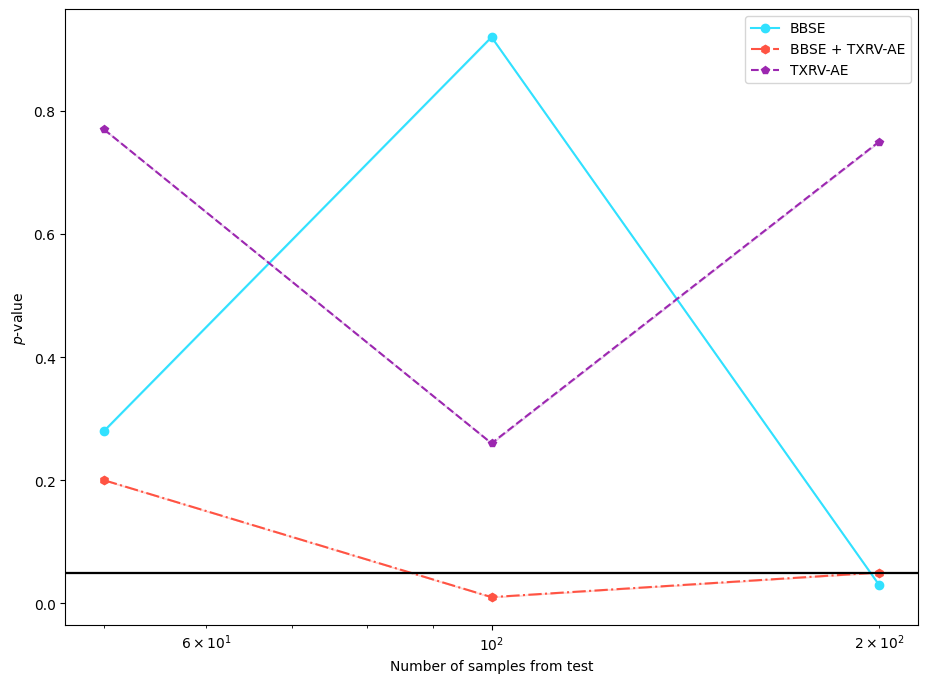

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.24 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.04 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.15 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.89 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.61 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.95 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.29 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.56 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.39 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.55 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.25 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.56 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.22 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.23 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.66 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.79 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.14 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.86 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.65 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.42 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.67 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.32 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.41 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.59 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.53 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.77 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.85 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.57 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.48 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.42 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.24 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.61 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.17 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.03 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.99 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.77 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.18 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.23 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.47 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.44 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.92 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.61 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.39 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.30 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.13 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.25 examples/s]

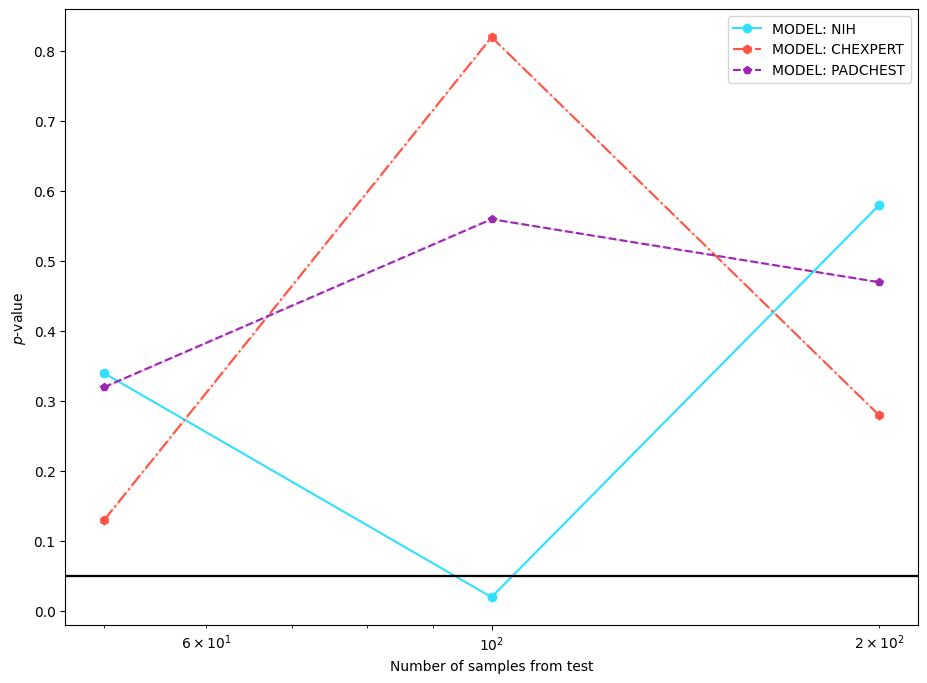

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55935.47 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72054.24 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85250.25 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89575.67 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 92593.75 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 95913.58 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50198.10 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 69229.68 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 80528.20 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87089.79 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 91804.39 examples/s]

Filter (num_proc=6):  98%|█████████▊| 110434/112120 [00:01<00:00, 88436.18 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.56 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.07 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.31 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.00 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.86 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.04 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.71 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.01 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.38 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.27 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.00 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.04 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.47 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.39 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.65 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.67 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48175.78 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 65918.02 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 77202.38 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 85263.19 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 90359.42 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 93586.95 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49980.56 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 66272.15 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 76332.42 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87602.88 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98187.71 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107727.82 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.59 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.28 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.82 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.41 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.35 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.42 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.83 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.81 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.34 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.44 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.67 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.74 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50841.29 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71103.63 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 81277.22 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87578.40 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 89514.91 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 93848.01 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 46321.76 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 63559.36 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 73889.25 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:01<00:00, 81542.84 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 87679.89 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 92059.25 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.88 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.64 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.91 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.16 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.77 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.60 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.30 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.09 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.37 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.59 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.75 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.75 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.87 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.44 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48786.58 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68522.15 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 78494.74 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87527.74 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 94658.95 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107511.42 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 47746.46 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68607.05 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 79891.67 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 86359.25 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 91002.13 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 92784.33 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.80 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.18 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.82 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.96 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.93 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.71 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.65 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.33 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.31 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.81 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.43 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.08 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.16 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.98 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.41 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.54 examples/s]

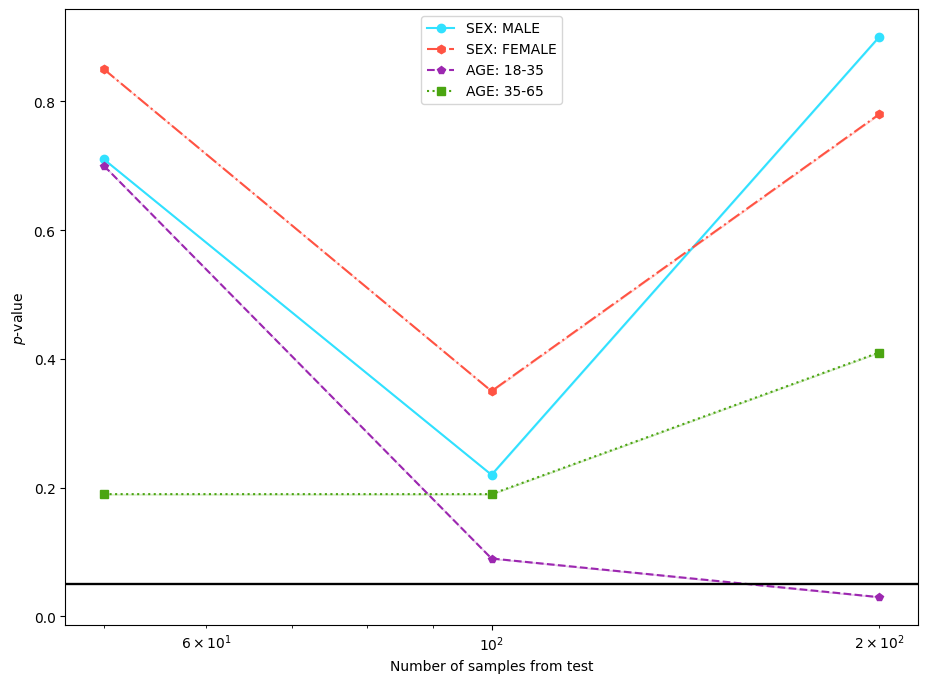

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.16 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.90 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.40 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.74 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.67 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.57 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.96 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.34 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.33 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.04 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.52 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.16 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.87 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.12 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.02 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.34 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.04 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.47 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.91 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.98 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.85 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.59 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.82 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.87 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.74 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.28 examples/s]

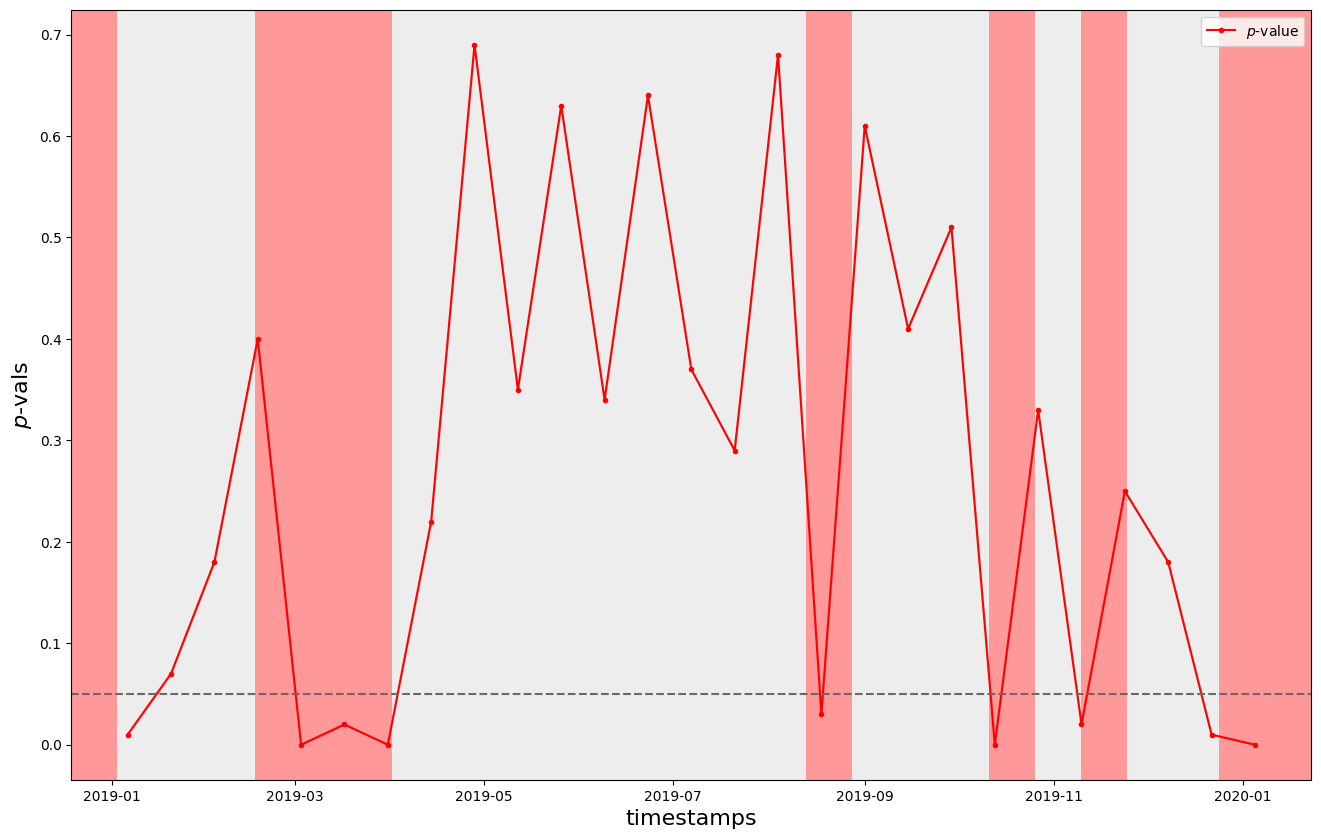

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)